In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
csv_file_path = './trade.csv'
trade = pd.read_csv(csv_file_path) 

In [6]:
trade_original = trade.copy()

In [5]:
trade.count()

기간      199
국가명     199
수출건수    196
수출금액    195
수입건수    196
수입금액    196
무역수지    195
기타사항      0
dtype: int64

In [3]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [12]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [13]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [15]:
trade.loc[trade.isnull().any(axis=1), ["기간", "국가명"]]

,기간,국가명
191,2020년 04월,미국
196,2020년 06월,중국
197,2020년 06월,미국
198,2020년 06월,일본


In [18]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


In [19]:
trade[(trade['국가명']=='미국') & ((trade['기간']=='2020년 03월') | (trade['기간']=='2020년 05월'))]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [27]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] ) / 2

In [28]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액']

In [23]:
trade.loc[191, '수출금액'] = np.round(np.mean(trade.loc[:,'수출금액']), 1)

In [29]:
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


In [30]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [31]:
trade[(trade['기간']=='2020년 03월') & (trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [32]:
trade.drop_duplicates(inplace=True)

## outlier

In [34]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std( df[col] ) > z].index

In [35]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [36]:
def outlier2(df, col):
    
    Q3, Q1 = np.percentile(df[col], [75 ,25])
    IQR = Q3 - Q1
    
    return df[(Q1 - 1.5 * IQR > df[col]) | (Q3 + 1.5 * IQR < df[col])]

In [37]:
outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


## standardization, min-max

In [38]:
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})

In [39]:
x_standardization = (x-x.mean())/x.std()
x_standardization

,A,B
0,-0.952965,0.180983
1,-0.987247,0.117478
2,0.939033,-0.527781
3,0.641682,-0.445655
4,1.268368,-0.200212
...,...,...
95,0.315199,-1.071560
96,0.636290,-1.135734
97,0.650504,0.375960
98,-0.606693,1.022803


In [67]:
x_standardization.describe()

,A,B
count,1.000000e+02,1.000000e+02
mean,9.936496e-17,-1.909584e-16
std,1.000000e+00,1.000000e+00
min,-2.404474e+00,-2.550979e+00
25%,-7.770786e-01,-6.417768e-01
50%,-4.272361e-03,4.935314e-02
75%,6.376380e-01,6.535017e-01
max,2.975019e+00,2.148534e+00


(array([[ 3.,  4., 13., 12., 26., 21., 13.,  3.,  4.,  1.],
        [ 3.,  3., 17., 14., 19., 20., 15.,  6.,  3.,  0.]]),
 array([-2.55097879, -1.99837902, -1.44577925, -0.89317948, -0.34057971,
         0.21202006,  0.76461983,  1.3172196 ,  1.86981937,  2.42241914,
         2.97501891]),
 <a list of 2 BarContainer objects>)

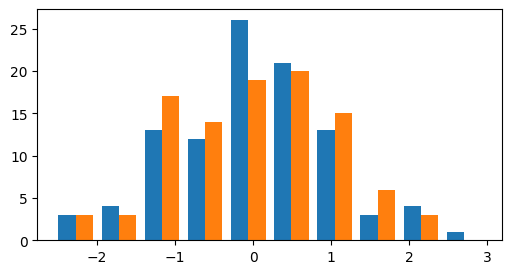

In [73]:
plt.figure(figsize=(6,3))
plt.hist(x_standardization)

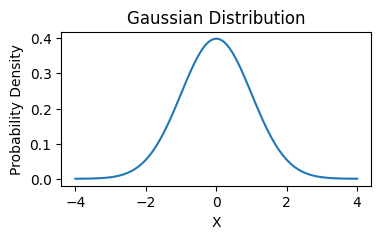

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Set mean and standard deviation
mu = 0      # Mean
sigma = 1   # Standard deviation

# Generate data points for x-axis
x = np.linspace(-4, 4, 100)

# Calculate the corresponding y-values of the Gaussian distribution
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.figure(figsize=(4,2))

# Plot the Gaussian distribution
plt.plot(x, y)

# Set plot title and labels
plt.title("Gaussian Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")

# Display the plot
plt.show()


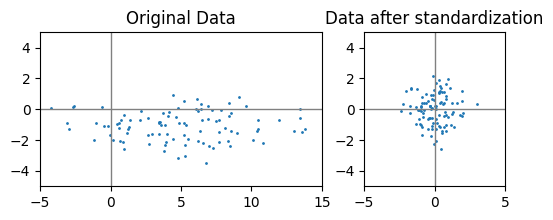

In [63]:
fig, axs = plt.subplots(1,2, figsize=(6, 2),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'], s=1)
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'], s=1)
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

In [40]:
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.269823,0.581329
1,0.263450,0.567816
2,0.621528,0.430512
3,0.566253,0.447988
4,0.682749,0.500215
...,...,...
95,0.505563,0.314803
96,0.565251,0.301147
97,0.567893,0.622817
98,0.334192,0.760458


In [66]:
x_min_max.describe()

,A,B
count,100.000000,100.000000
mean,0.446970,0.542818
std,0.185891,0.212788
min,0.000000,0.000000
25%,0.302518,0.406255
50%,0.446176,0.553320
75%,0.565502,0.681875
max,1.000000,1.000000


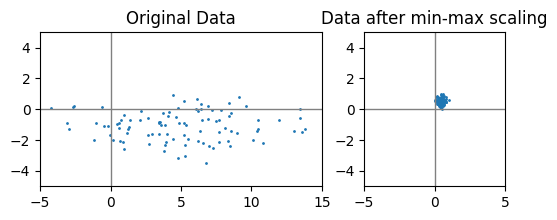

In [64]:
fig, axs = plt.subplots(1,2, figsize=(6, 2),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'], s=1)
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'], s=1)
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [41]:
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [42]:
trade_standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,2.277381e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


In [43]:
# Q. trade 데이터를 min-max scaling 기법으로 정규화합니다.
trade[cols] = (trade[cols] - trade[cols].min()) / (trade[cols].max() - trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [45]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

In [46]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min) / (train_max - train_min)
test_min_max = (train - train_min) / (train_max - train_min)

In [47]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()


In [49]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [50]:
scaler.transform(test)

array([[-0.25,  0.55]])

## one-hot encoding

In [51]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,True,False,False


In [52]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,False,False,True
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,True,False,False
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,False,True,False
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,False,False,True
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,True,False,False


In [53]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,False,False,True
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,True,False,False
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,False,True,False
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,False,False,True
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,True,False,False
